# Binary class classification CNN

## Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded zip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-02 20:03:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 142.251.172.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   236MB/s    in 0.4s    

2023-07-02 20:03:20 (236 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Know the number of the images
for dirpath,dirname,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} dirctorys and {len(filenames)} images in '{dirpath}' ")

There are 2 dirctorys and 0 images in 'pizza_steak' 
There are 2 dirctorys and 0 images in 'pizza_steak/train' 
There are 0 dirctorys and 750 images in 'pizza_steak/train/steak' 
There are 0 dirctorys and 750 images in 'pizza_steak/train/pizza' 
There are 2 dirctorys and 0 images in 'pizza_steak/test' 
There are 0 dirctorys and 250 images in 'pizza_steak/test/steak' 
There are 0 dirctorys and 250 images in 'pizza_steak/test/pizza' 


In [ ]:
len(os.listdir("pizza_steak/test/steak"))

250

In [ ]:
numOfImages_train = len(os.listdir("pizza_steak/train/steak"))
numOfImages_test = len(os.listdir("pizza_steak/test/steak"))
numOfImages_train, numOfImages_test

(750, 250)

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Look for our images visualy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #matplotimage
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)  # Randomly sample one of the items in the "target folder"

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) #[0] because the random image wich returen is in a list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}")

Image shape (512, 512, 3)


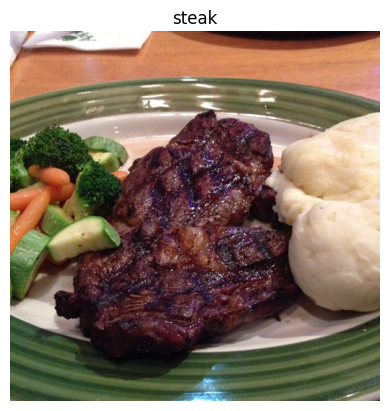

In [ ]:
view_random_image(target_dir="pizza_steak/train",
                        target_class="steak")         # When i removed the "img" in this cell i got long result

## Example of CNN

* Load the data
* Preprocess our images
* build a CNN to find patterns in our model
* Compile our CNN
* Fit the CNN to traing data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.
                                                                    # Data augmentation is generating new data points from existing data.
tf.random.set_seed(42)
# Preprocess data(normalize all pixel values)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data dirctories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from dirctories and turn them into bateches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), # This layer as the previos one
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
# Fit
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),  # It's 47 and it's comes from (1500/32)
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 34s 350ms/step - loss: 0.6097 - accuracy: 0.6633 - val_loss: 0.5306 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4501 - accuracy: 0.8027 - val_loss: 0.3698 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 13s 274ms/step - loss: 0.3940 - accuracy: 0.8200 - val_loss: 0.4319 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3522 - accuracy: 0.8500 - val_loss: 0.3393 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.2614 - accuracy: 0.8980 - val_loss: 0.3633 - val_accuracy: 0.8480


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Give the model of classification chance infront of CNN

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation(tf.nn.sigmoid)
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics= ['accuracy'])
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 226ms/step - loss: 1.0616 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1505290   
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 263ms/step - loss: 3.3982 - accuracy: 0.6180 - val_loss: 1.9954 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 1.2472 - accuracy: 0.6960 - val_loss: 0.5632 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.7824 - accuracy: 0.7167 - val_loss: 0.4790 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.7041 - accuracy: 0.7360 - val_loss: 0.4534 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4934 - accuracy: 0.7847 - val_loss: 0.5650 - val_accuracy: 0.7720


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Break CNN down

### Visualize data

Image shape (512, 512, 3)
Image shape (512, 384, 3)


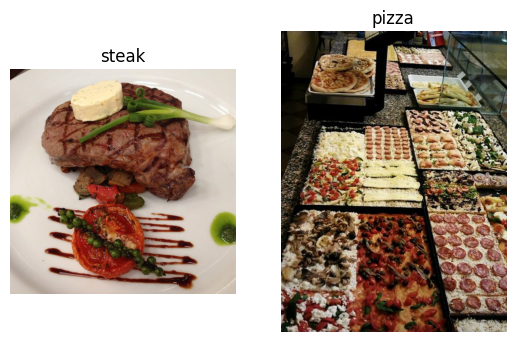

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')

### Preprocess data
* Batchs
* Normalization

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-bdc383fe-afcc-7d06-089a-6a94dc5f57f3)


In [ ]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Creat train and test dataset
train_data = train_gen.flow_from_directory(directory=train_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32)
test_data = test_gen.flow_from_directory(directory=test_dir,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)  #the results mean, there is 32 image and label in each batch

(32, 32)

In [ ]:
images[31].shape

(224, 224, 3)

### Create the model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer
])

In [ ]:
from keras.losses import binary_crossentropy
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=4,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/4
47/47 [==============================] - 13s 237ms/step - loss: 1.0944 - accuracy: 0.5333 - val_loss: 0.6908 - val_accuracy: 0.6520
Epoch 2/4
47/47 [==============================] - 11s 237ms/step - loss: 0.6143 - accuracy: 0.7300 - val_loss: 0.5040 - val_accuracy: 0.7580
Epoch 3/4
47/47 [==============================] - 11s 236ms/step - loss: 0.4528 - accuracy: 0.8027 - val_loss: 0.3735 - val_accuracy: 0.8540
Epoch 4/4
47/47 [==============================] - 14s 288ms/step - loss: 0.3148 - accuracy: 0.8753 - val_loss: 0.4053 - val_accuracy: 0.8320


### Evaluate the model

<Axes: >

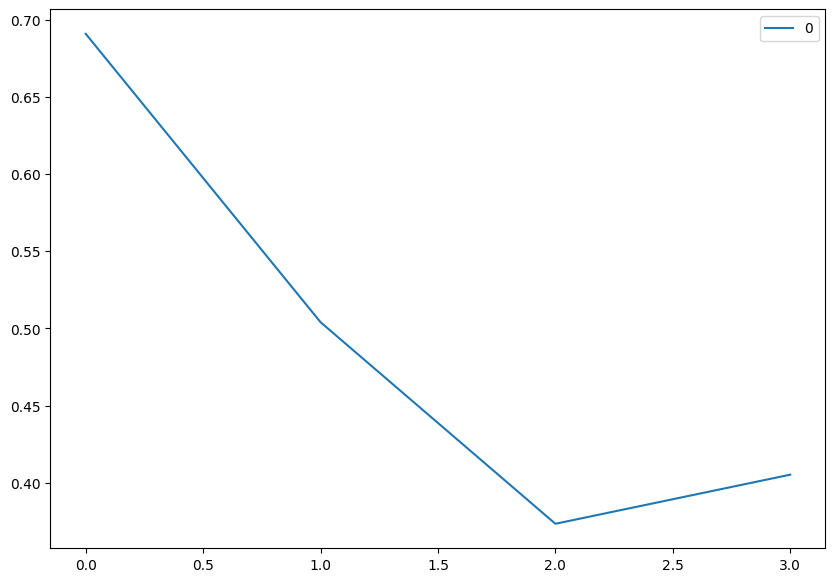

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history['val_loss']).plot(figsize=(10,7))

In [ ]:
# Plot the training loss and training accuracy curves separately

def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy= history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot the loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()

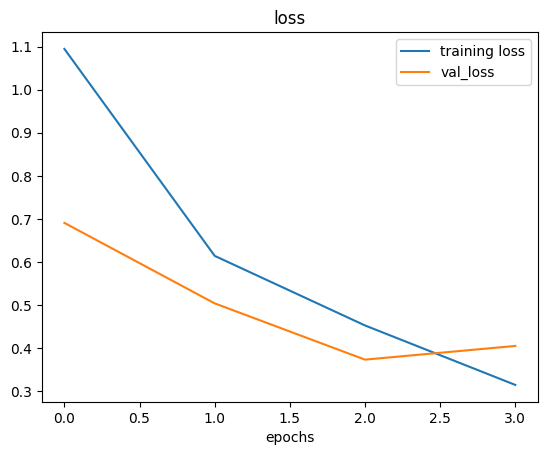

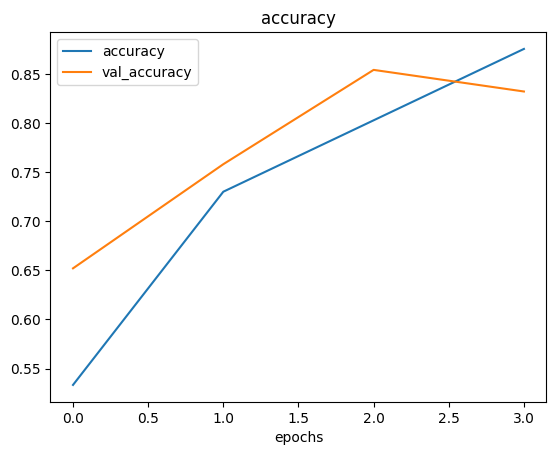

In [ ]:
plot_loss_curves(history_4)

When a model's **validation loss** starts to increase, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10 ,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics= ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 230ms/step - loss: 0.6057 - accuracy: 0.6713 - val_loss: 0.5514 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 12s 267ms/step - loss: 0.5166 - accuracy: 0.7467 - val_loss: 0.4548 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4546 - accuracy: 0.7887 - val_loss: 0.4161 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 13s 284ms/step - loss: 0.4239 - accuracy: 0.8133 - val_loss: 0.5071 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4091 - accuracy: 0.8153 - val_loss: 0.3963 - val_accuracy: 0.8220


In [ ]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

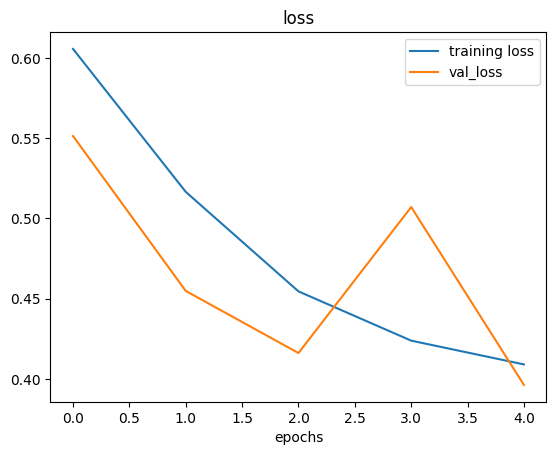

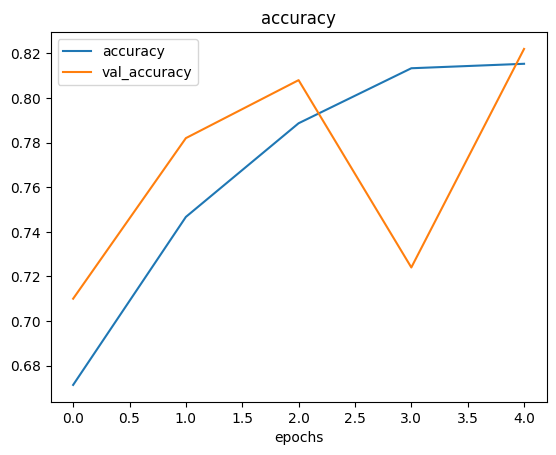

In [ ]:
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
train_gen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_gen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
test_data = test_gen.flow_from_directory(test_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, label = train_data.next()
augmented_images, _ = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

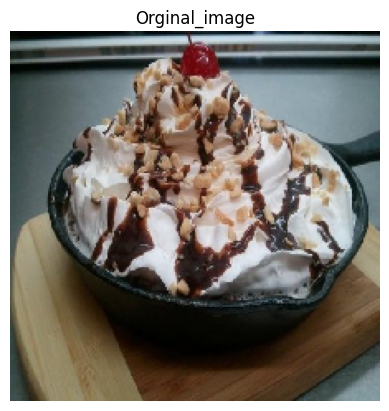

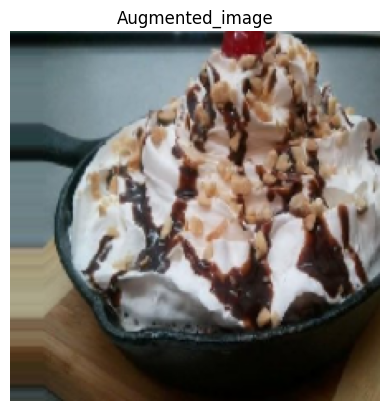

In [ ]:
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title('Orginal_image')
plt.axis(False)   # To deleat the numbers on axis
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented_image')
plt.axis(False)

### Model train on augmented data

In [ ]:
model_6 = Sequential([
    Conv2D(filters= 10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 564ms/step - loss: 0.7338 - accuracy: 0.4967 - val_loss: 0.6809 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6912 - accuracy: 0.5347 - val_loss: 0.6609 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6918 - accuracy: 0.5613 - val_loss: 0.6621 - val_accuracy: 0.6040
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6714 - accuracy: 0.6047 - val_loss: 0.6118 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.6451 - accuracy: 0.6480 - val_loss: 0.5097 - val_accuracy: 0.8100


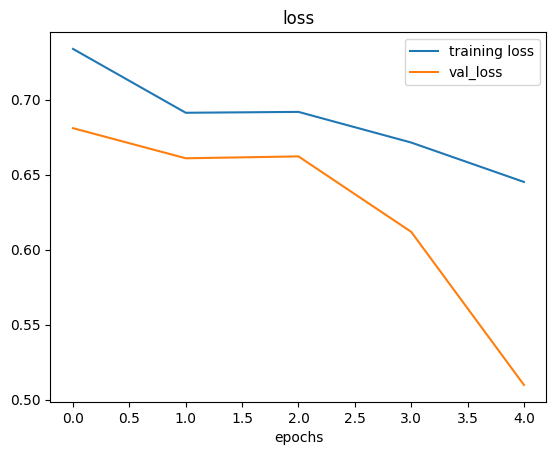

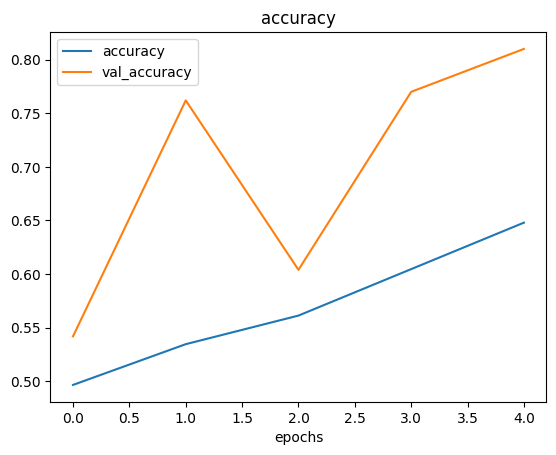

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled= train_gen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           batch_size=32,
                                                                           class_mode='binary',
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='relu')
])
model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data =test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 505ms/step - loss: 0.8557 - accuracy: 0.4927 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 26s 557ms/step - loss: 0.6667 - accuracy: 0.6187 - val_loss: 0.5155 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 24s 509ms/step - loss: 0.6270 - accuracy: 0.6820 - val_loss: 0.7885 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.5838 - accuracy: 0.7053 - val_loss: 0.4944 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5841 - accuracy: 0.7740 - val_loss: 0.4095 - val_accuracy: 0.8460


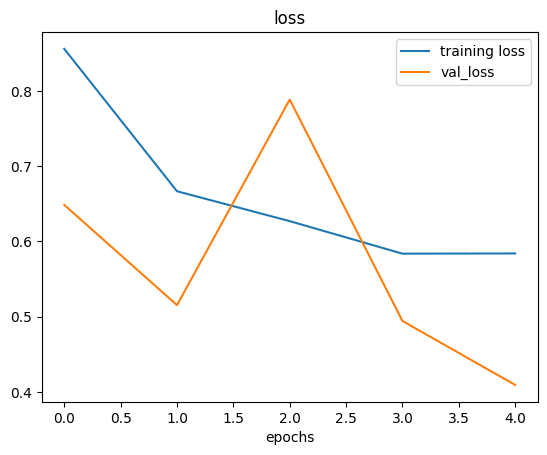

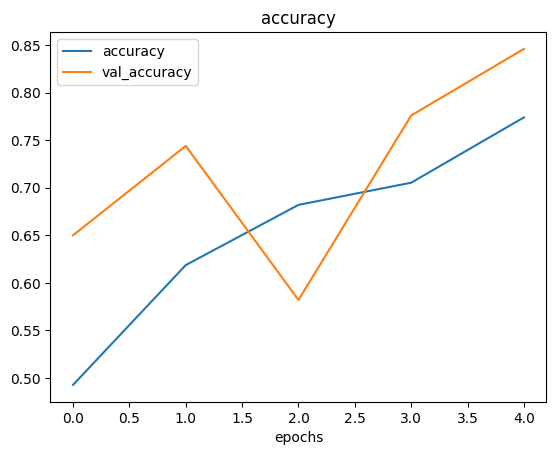

In [ ]:
plot_loss_curves(history_7)

## Predict on our data

--2023-07-02 21:25:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-02 21:25:47 (32.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



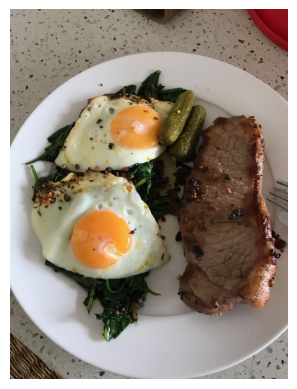

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = np.array(mpimg.imread('03-steak.jpeg'))
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# model_7.predict(steak)
#   dim problem

In [ ]:
#expanded_steak=tf.expand_dims(steak, axis=0)
#expanded_steak.shape

In [ ]:
# model_7.predict(expanded_steak)
#   shape_problem

In [ ]:
# reshape the image to fit in the model we built

def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)

  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')

In [ ]:
pred = model_5.predict(steak)

1/1 [==============================] - 0s 153ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
prediction = class_names[int(tf.round(pred))]
prediction

'steak'

In [ ]:
# Make function to prdict the class of image

def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


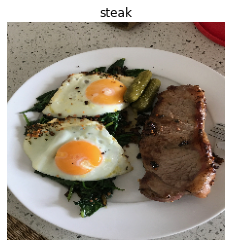

In [ ]:
pred_and_plot(model_5, "03-steak.jpeg")

--2023-02-26 22:26:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-26 22:26:28 (280 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 29ms/step


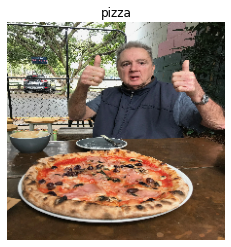

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_5, '03-pizza-dad.jpeg')

# Multiclass Class Classification CNN

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat 7 baseline/reduce overfitting)
8. Repeat until satisfied

## Import the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-02 21:29:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  69.4MB/s    in 6.2s    

2023-07-02 21:29:21 (80.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/10_food_classes_all_data.zip')
zip_file.extractall()
zip_file.close()

In [ ]:
# Walk throgh the data
import os

for dirpath, dirname, filename in os.walk('/content/10_food_classes_all_data'):
  print(f"There are {len(dirname)} dirctory and {len(filename)} images in '{dirpath}' ")
  #print(len(filename))

There are 2 dirctory and 0 images in '/content/10_food_classes_all_data' 
There are 10 dirctory and 0 images in '/content/10_food_classes_all_data/test' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/steak' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/sushi' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/ice_cream' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/hamburger' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/chicken_wings' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/pizza' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/ramen' 
There are 0 dirctory and 250 images in '/content/10_food_classes_all_data/test/fried_rice' 
There are 0 dirctory and 250 imag

In [ ]:
# Get the classes names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape (512, 512, 3)


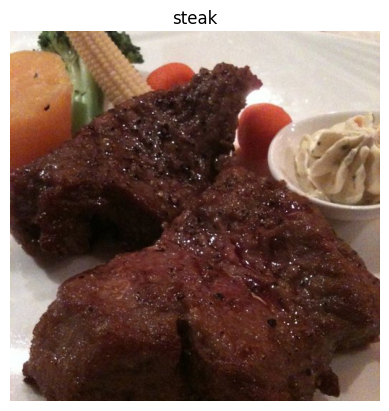

In [ ]:
view_random_image('/content/10_food_classes_all_data/train',
                  random.choice(class_names))

## Preproces the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import activations, losses
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

training_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)
testing_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Builed the model

In [ ]:
model_8 = Sequential([
    Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
model_8.compile(loss = losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])

## Fit it

In [ ]:
history_8 = model_8.fit(training_data,
                        epochs=5,
                        steps_per_epoch=len(training_data),
                        validation_data=testing_data,
                        validation_steps=len(testing_data)) # We can add scaler like 0.25 and multibaly it with the len of test data this
                                                            #  validat the model on 25 per cent of the data

Epoch 1/5
235/235 [==============================] - 60s 238ms/step - loss: 2.1907 - accuracy: 0.1912 - val_loss: 2.0234 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 52s 222ms/step - loss: 1.8716 - accuracy: 0.3548 - val_loss: 1.8634 - val_accuracy: 0.3404
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.3526 - accuracy: 0.5489 - val_loss: 2.1256 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 54s 231ms/step - loss: 0.6340 - accuracy: 0.7957 - val_loss: 2.8976 - val_accuracy: 0.2744
Epoch 5/5
235/235 [==============================] - 52s 222ms/step - loss: 0.1910 - accuracy: 0.9463 - val_loss: 4.3871 - val_accuracy: 0.2708


## Evaluate it

In [ ]:
model_8.evaluate(testing_data)

79/79 [==============================] - 13s 158ms/step - loss: 4.3871 - accuracy: 0.2708


[4.387086391448975, 0.27079999446868896]

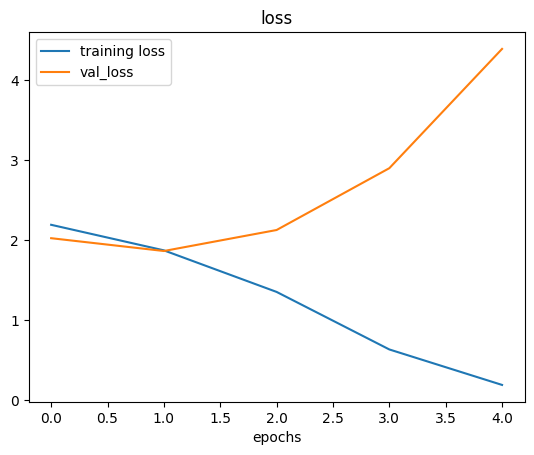

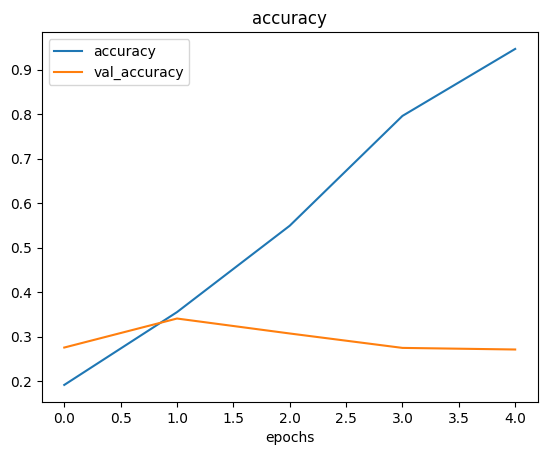

In [ ]:
plot_loss_curves(history_8)

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

## Beat the baseline and reduce overfitting



### reduce the overfiiting by simplify the model

In [ ]:
# Simplify the model 8
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])
model_9.compile(loss= losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_9 = model_9.fit(training_data,
                        epochs=5,
                        steps_per_epoch=len(training_data),
                        validation_data=testing_data,
                        validation_steps=len(testing_data))

Epoch 1/5
235/235 [==============================] - 52s 213ms/step - loss: 2.1217 - accuracy: 0.2341 - val_loss: 1.9762 - val_accuracy: 0.2912
Epoch 2/5
235/235 [==============================] - 49s 210ms/step - loss: 1.8236 - accuracy: 0.3769 - val_loss: 1.8587 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 49s 211ms/step - loss: 1.5158 - accuracy: 0.4984 - val_loss: 1.8706 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 71s 302ms/step - loss: 1.0665 - accuracy: 0.6659 - val_loss: 2.1372 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.6484 - accuracy: 0.8156 - val_loss: 2.3622 - val_accuracy: 0.3312


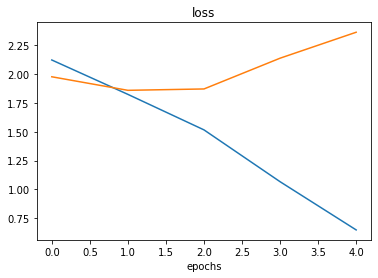

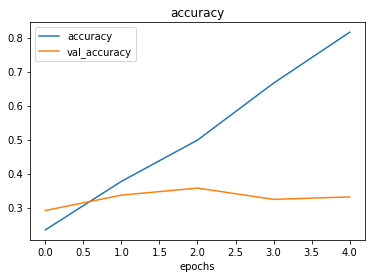

In [ ]:
plot_loss_curves(history_9)

### Reduce the over fitting by data augmentation

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale= 1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
training_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                          target_size=(224,224),
                                                          batch_size=32,
                                                          class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])
model_10.compile(loss = losses.categorical_crossentropy,
                 optimizer = Adam(),
                 metrics=['accuracy'])

In [ ]:
history_10 = model_10.fit(training_data_aug,
                          epochs=5,
                          steps_per_epoch=len(training_data_aug),
                          validation_data=testing_data,
                          validation_steps=len(testing_data))

Epoch 1/5
 13/235 [>.............................] - ETA: 1:44 - loss: 2.2996 - accuracy: 0.1370

In [ ]:
model_10.evaluate(testing_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.8647 - accuracy: 0.3604


[1.8647494316101074, 0.36039999127388]

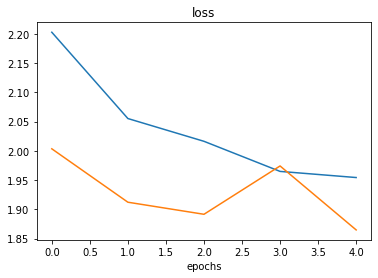

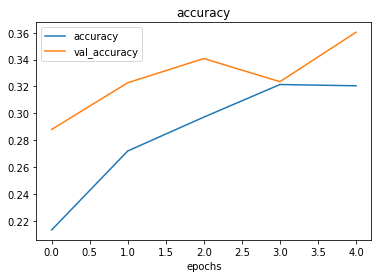

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_11 = tf.keras.models.clone_model(model_10)
model_11.compile(loss = losses.categorical_crossentropy,
                 optimizer = Adam(),
                 metrics=['accuracy'])

In [ ]:
history_11 = model_11.fit(training_data_aug,
                          epochs=10,
                          steps_per_epoch=len(training_data_aug),
                          validation_data=testing_data,
                          validation_steps=len(testing_data))

Epoch 1/10
235/235 [==============================] - 127s 534ms/step - loss: 2.1605 - accuracy: 0.2289 - val_loss: 1.9320 - val_accuracy: 0.3384
Epoch 2/10
235/235 [==============================] - 129s 551ms/step - loss: 2.0221 - accuracy: 0.2904 - val_loss: 1.8950 - val_accuracy: 0.3388
Epoch 3/10
235/235 [==============================] - 147s 627ms/step - loss: 1.9699 - accuracy: 0.3121 - val_loss: 1.7932 - val_accuracy: 0.3788
Epoch 4/10
235/235 [==============================] - 118s 503ms/step - loss: 1.9516 - accuracy: 0.3244 - val_loss: 1.8179 - val_accuracy: 0.3620
Epoch 5/10
235/235 [==============================] - 117s 499ms/step - loss: 1.9326 - accuracy: 0.3401 - val_loss: 1.7684 - val_accuracy: 0.3672
Epoch 6/10
235/235 [==============================] - 116s 494ms/step - loss: 1.8833 - accuracy: 0.3509 - val_loss: 1.7149 - val_accuracy: 0.4088
Epoch 7/10
235/235 [==============================] - 127s 542ms/step - loss: 1.8573 - accuracy: 0.3664 - val_loss: 1.7138 -

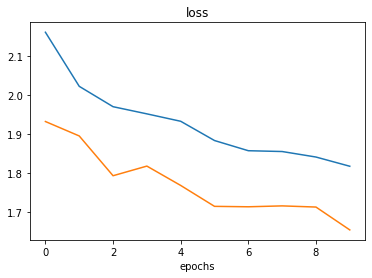

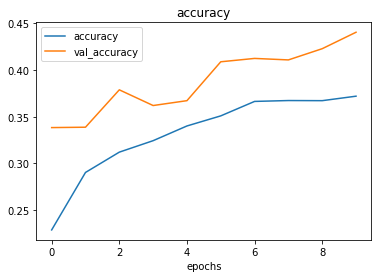

In [ ]:
plot_loss_curves(history_11)

## Make prediction

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-02-28 22:38:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.06s   

2023-02-28 22:38:08 (55.9 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-02-28 22:38:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting res

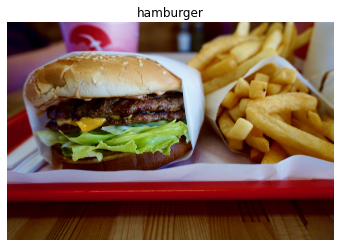

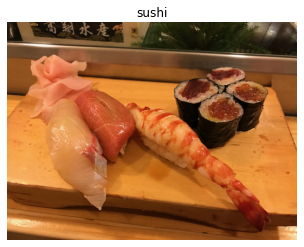

In [ ]:
hamburger = np.array(mpimg.imread('03-hamburger.jpeg'))
sushi= np.array(mpimg.imread('03-sushi.jpeg'))
plt.imshow(hamburger)
plt.title('hamburger')
plt.axis(False)

plt.figure()
plt.imshow(sushi)
plt.title('sushi')
plt.axis(False);

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # preprosses the imag
  img = load_and_prep_image(filename)
  # predict the image
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class= class_names[int(tf.round(pred[0]))]


  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False);

1/1 [==============================] - 0s 32ms/step


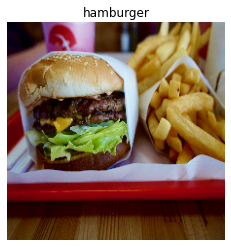

In [ ]:
pred_and_plot(model_11,'03-hamburger.jpeg' )

1/1 [==============================] - 0s 30ms/step


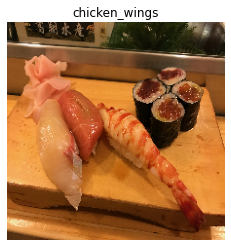

In [ ]:
pred_and_plot(model_11,'03-sushi.jpeg' )

In [ ]:
model_11.save('saved_trained_model_11')

In [ ]:
loaded_model_11 = tf.keras.models.load_model('/content/saved_trained_model_11')
loaded_model_11.evaluate(testing_data)

79/79 [==============================] - 13s 155ms/step - loss: 1.6546 - accuracy: 0.4404


[1.6545544862747192, 0.44040000438690186]